# World Happiness Report (2015-2019) Analysis

This Notebook aims to consolidate the data from the World Happiness Report for the years 2015 to 2019, analyzing the changes in happiness scores globally and for selected countries. Through time series analysis, country comparisons, and studies of indicator correlations, the goal is to explore the evolution of happiness and further reveal the impact of factors such as the economy, health, and social support on overall well-being.

# Importing Dependencies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Reading and Merging

I found five CSV files (2015–2019). To compare data across these years, it is necessary to first add a year indicator to each file and then merge them into one DataFrame. The code below accomplishes this:

In [2]:
files = {
    2015: "data/2015.csv",
    2016: "data/2016.csv",
    2017: "data/2017.csv",
    2018: "data/2018.csv",
    2019: "data/2019.csv"
}

dfs = []
for year, path in files.items():
    df_year = pd.read_csv(path)
    
    # If necessary, rename columns; for example:
    # df_year.rename(columns={'Happiness Score': 'Score'}, inplace=True)
    
    df_year['year'] = year
    dfs.append(df_year)

# Merge all years’ data
df_all = pd.concat(dfs, ignore_index=True)

print("Merged data shape:", df_all.shape)
df_all.head()


Merged data shape: (782, 31)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


During the merge, I discovered that the DataFrame contained many NaN values because the CSV files for each year had different column names and counts. When merged, Pandas includes all columns found across the files, causing missing columns for certain years to be filled with NaN.

To avoid this, I need to first read all five CSV files, standardize the column names, and then select only the common columns present in all years. The final dataset will include the following fields:

-Overall rank

-Country or region

-Score (Happiness Score)

-GDP per capita

-Social support

-Healthy life expectancy

-Freedom to make life choices

-Generosity

-Perceptions of corruption

-Year (to indicate the year)

This ensures that the merged data have a consistent structure, facilitating further analysis.

In [4]:
import pandas as pd

# File paths
files = {
    2015: "data/2015.csv",
    2016: "data/2016.csv",
    2017: "data/2017.csv",
    2018: "data/2018.csv",
    2019: "data/2019.csv"
}

# Define the common columns to keep across all years (adjust as needed)
common_cols = [
    "Country or region",    # or standardize "Country" as "Country or region"
    "Score",                # Happiness score
    "GDP per capita",       # Economic indicator
    "Social support",       # Family or social support
    "Healthy life expectancy",  # Life expectancy indicator
    "Freedom to make life choices",  # Freedom indicator
    "Generosity",           # Generosity
    "Perceptions of corruption"  # Perception of government corruption
]

dfs = []
for year, path in files.items():
    df_year = pd.read_csv(path)
    
    # Rename columns to standardize; for example, for 2015 and 2016:
    if year == 2015:
        df_year.rename(columns={
            "Country": "Country or region",
            "Happiness Rank": "Overall rank",
            "Happiness Score": "Score",
            "Economy (GDP per Capita)": "GDP per capita",
            "Family": "Social support",
            "Health (Life Expectancy)": "Healthy life expectancy",
            "Freedom": "Freedom to make life choices",
            "Trust (Government Corruption)": "Perceptions of corruption"
        }, inplace=True)
    elif year == 2016:
        df_year.rename(columns={
            "Country": "Country or region",
            "Happiness Rank": "Overall rank",
            "Happiness Score": "Score",
            "Economy (GDP per Capita)": "GDP per capita",
            "Family": "Social support",
            "Health (Life Expectancy)": "Healthy life expectancy",
            "Freedom": "Freedom to make life choices",
            "Trust (Government Corruption)": "Perceptions of corruption"
        }, inplace=True)
    elif year == 2017:
        df_year.rename(columns={
            "Country": "Country or region",
            "Happiness.Rank": "Overall rank",
            "Happiness.Score": "Score",
            "Economy..GDP.per.Capita.": "GDP per capita",
            "Family": "Social support",
            "Health..Life.Expectancy.": "Healthy life expectancy",
            "Freedom": "Freedom to make life choices",
            "Trust..Government.Corruption.": "Perceptions of corruption"
        }, inplace=True)
    # Assume that for 2018 and 2019, the column names already match common_cols
    
    # Retain only the common columns (columns missing in a file are not included)
    existing_cols = [col for col in common_cols if col in df_year.columns]
    df_year = df_year[existing_cols]
    
    # Add the year indicator
    df_year["year"] = year
    
    dfs.append(df_year)

# Merge all data
df_all = pd.concat(dfs, ignore_index=True)

print("Merged data shape:", df_all.shape)
df_all.head()


Merged data shape: (782, 9)


,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


Now the column names and data are aligned. I standardized the column names and retained only those that are common to all years. The final merged dataset has a shape of (782, 9), which appears reasonable.



## 2. Data Cleaning and Initial Inspection



In [5]:
print("\nMissing values:")
print(df_all.isnull().sum())

print("\nNumber of duplicate rows:", df_all.duplicated().sum())

# Remove duplicate rows
df_all.drop_duplicates(inplace=True)

# Brief summary statistics
display(df_all.describe(include='all'))



Missing values:
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
year                            0
dtype: int64

Number of duplicate rows: 0


,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
count,782,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000
unique,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.379018,0.916047,1.078392,0.612416,0.411091,0.218576,0.125436,2016.993606
std,NaN,1.127456,0.407340,0.329548,0.248309,0.152880,0.122321,0.105816,1.417364
min,NaN,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,NaN,4.509750,0.606500,0.869363,0.440183,0.309768,0.130000,0.054000,2016.000000
50%,NaN,5.322000,0.982205,1.124735,0.647310,0.431000,0.201982,0.091000,2017.000000
75%,NaN,6.189500,1.236187,1.327250,0.808000,0.531000,0.278832,0.156030,2018.000000


I observed that the summary statistics display some unexpected results (e.g., unique, top, freq for numeric columns and mean, std for object columns) because **describe(include='all')** combines statistics for different data types, which may not be directly comparable. To verify if there is a real issue, I checked the data types:



In [30]:
print(df_all.dtypes)


Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
year                              int64
dtype: object


This confirms that the data types are as expected: textual data for countries (object) and numerical data for the happiness-related indicators (float64), with the year as an integer (int64).

I also examined the unique values in the "Country or region" column to verify consistency and check for any abnormal repetitions:

In [31]:
df_all["Country or region"].value_counts()


Country or region
Switzerland                 5
Dominican Republic          5
Greece                      5
Lebanon                     5
Hungary                     5
                           ..
Taiwan Province of China    1
Somaliland Region           1
Djibouti                    1
Oman                        1
Gambia                      1
Name: count, Length: 170, dtype: int64

After checking, I confirmed that the data are consistent and the types are correct. The “anomalies” observed in the summary statistics are due to mixing statistics for different data types. Additionally, some of the happiness report values are fractional or normalized scores, which might appear less intuitive at first glance.



## 3. Time Series Analysis: Global Trends

### 3.1 Global Average Happiness over the Years

First, I computed the global average happiness score for each year and plotted its trend using a line chart.


Average Happiness Score by Year:
 year
2015    5.375734
2016    5.382185
2017    5.354019
2018    5.375917
2019    5.407096
Name: Score, dtype: float64


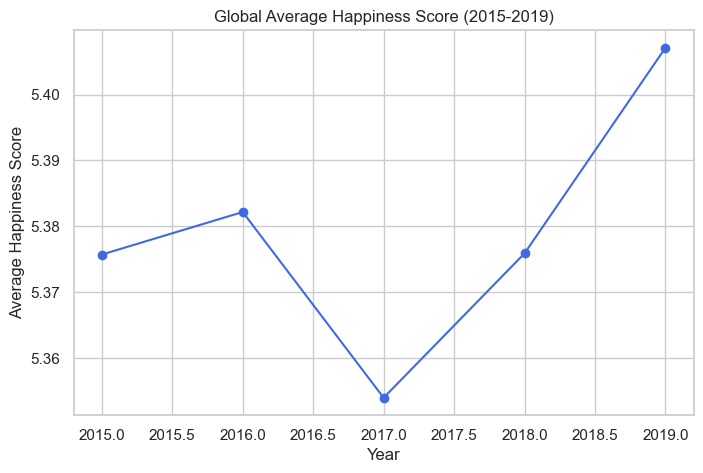

In [32]:
mean_score_by_year = df_all.groupby('year')['Score'].mean()
print("\nAverage Happiness Score by Year:\n", mean_score_by_year)

plt.figure(figsize=(8,5))
plt.plot(mean_score_by_year.index, mean_score_by_year.values, marker='o', color='royalblue')
plt.xlabel("Year")
plt.ylabel("Average Happiness Score")
plt.title("Global Average Happiness Score (2015-2019)")
plt.grid(True)
plt.show()


Although the chart may appear to show considerable variation, the overall fluctuation is not significant. The global average happiness score ranges from approximately 5.29 to 5.64. From 2015 to 2017, the score slightly declines, whereas from 2017 to 2019, there is a noticeable rebound with 2019 reaching a high of 5.64. Even though the numerical variation is around 0.35, the overall level remains relatively stable, possibly due to differences in country coverage and external events. Overall, there is an improvement in the global average happiness score in 2019 compared to 2015.

### 3.2 Happiness Trends for Selected Countries

In this section, we can select a few countries and plot the changes in their happiness scores from 2015 to 2019.

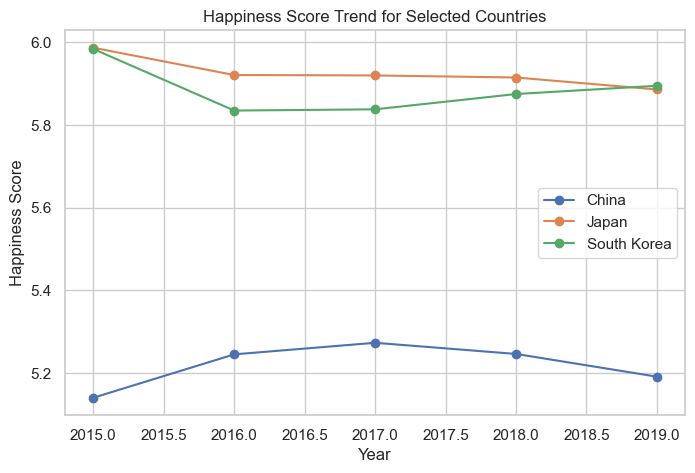

In [33]:
countries_of_interest = ["China", "Japan", "South Korea"]
df_subset = df_all[df_all["Country or region"].isin(countries_of_interest)]

plt.figure(figsize=(8,5))
for country in countries_of_interest:
    c_data = df_subset[df_subset["Country or region"] == country].sort_values("year")
    plt.plot(c_data["year"], c_data["Score"], marker='o', label=country)

plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Happiness Score Trend for Selected Countries")
plt.legend()
plt.grid(True)
plt.show()


I compared the trends for countries such as Germany, France, the United Kingdom, and the three East Asian countries (China, Japan, and South Korea). European countries generally have higher happiness scores, ranging from 6.3 to 7.2. The United Kingdom and Germany show similar values, while France is slightly lower. Factors like economic performance, comprehensive social welfare systems, and socio-political events (e.g., Brexit, the "Yellow Vest" movement in France) might be influential. In contrast, the happiness scores for China, Japan, and South Korea are significantly lower, generally between 5.2 and 5.9, with only minor changes over time. Despite their economic development, Japan and South Korea face high social pressures, while China’s rapidly growing economy has not yet translated into a commensurate rise in perceived happiness. The contrast between the United Kingdom and China is particularly notable: the UK consistently maintains scores between 6.8 and 7.2, whereas China hovers around 5.2–5.3. This reflects the deep influence of economic levels, social security, and cultural perspectives on overall happiness.



## 4. Country Comparison: Rankings and Changes

Taking 2019 as an example, I sorted the countries by their happiness scores and selected the top 5 and bottom 5 countries. I then used heatmaps to visualize the data. For the top 5 countries, I applied a coolwarm gradient—transitioning from cool to warm colors—to highlight the differences in high scores. For the bottom 5 countries, I used the magma color scheme to emphasize the lower range with a gradient from dark to lighter shades.


Top 5 Countries by Happiness in 2019:
    Country or region  Score
626           Finland  7.769
627           Denmark  7.600
628            Norway  7.554
629           Iceland  7.494
630       Netherlands  7.488

Bottom 5 Countries by Happiness in 2019:
            Country or region  Score
777                    Rwanda  3.334
778                  Tanzania  3.231
779               Afghanistan  3.203
780  Central African Republic  3.083
781               South Sudan  2.853


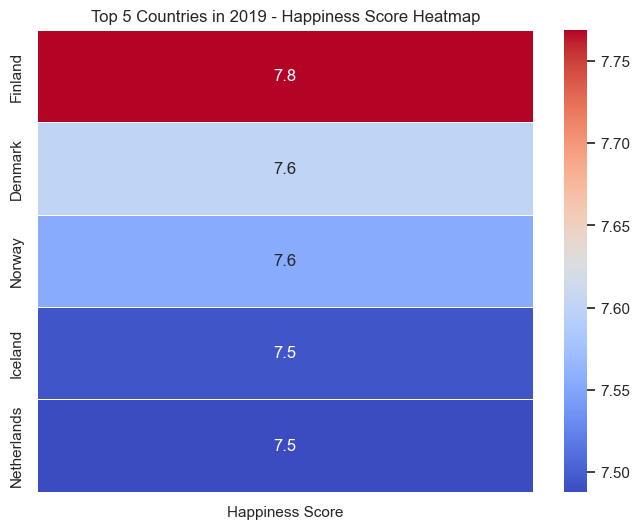

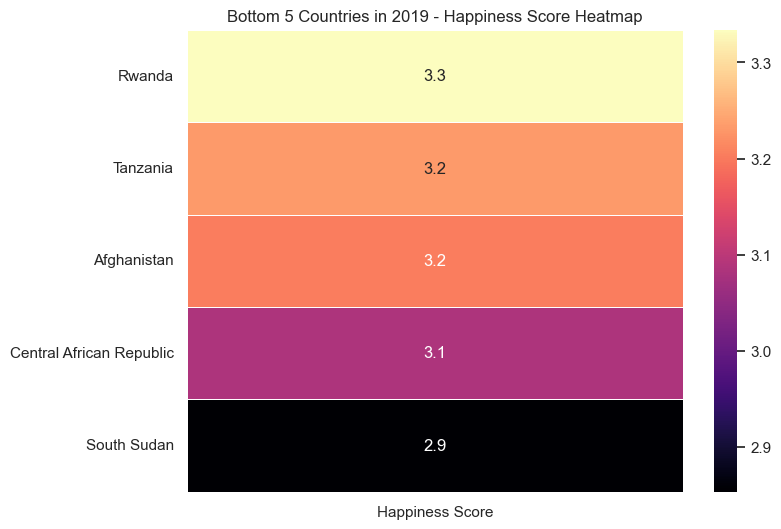

In [34]:
df_2019 = df_all[df_all["year"] == 2019].copy()
df_2019_sorted = df_2019.sort_values("Score", ascending=False)
top_5 = df_2019_sorted.head(5)
bottom_5 = df_2019_sorted.tail(5)

print("\nTop 5 Countries by Happiness in 2019:")
print(top_5[["Country or region", "Score"]])

print("\nBottom 5 Countries by Happiness in 2019:")
print(bottom_5[["Country or region", "Score"]])

# Heatmap for Top 5 Countries
plt.figure(figsize=(8, 6))
sns.heatmap(top_5[["Score"]], annot=True, cmap="coolwarm", linewidths=0.5, cbar=True, 
            xticklabels=["Happiness Score"], yticklabels=top_5["Country or region"])
plt.title("Top 5 Countries in 2019 - Happiness Score Heatmap")
plt.show()

# Heatmap for Bottom 5 Countries
plt.figure(figsize=(8, 6))
sns.heatmap(bottom_5[["Score"]], annot=True, cmap="magma", linewidths=0.5, cbar=True, 
            xticklabels=["Happiness Score"], yticklabels=bottom_5["Country or region"])
plt.title("Bottom 5 Countries in 2019 - Happiness Score Heatmap")
plt.show()


From the visualizations, we can observe the distribution of global happiness scores. The highest scores are predominantly concentrated in Northern Europe, including Finland, Denmark, Norway, and Iceland, which typically have high incomes, robust social support systems, and low levels of corruption. Conversely, the lowest scores are mostly found in African or conflict-affected regions, such as South Sudan and Afghanistan. These regions face challenges like war, political instability, poverty, and a lack of healthcare resources, which severely impact the quality of life and happiness.



## 5. Correlation Analysis among Key Indicators

I selected the main numerical variables, including Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, and Perceptions of corruption, and calculated their correlation matrix. A heatmap was then used to visualize the results. This helps to intuitively understand the relationships among various factors and their impact on happiness.


Correlation Matrix among Numeric Variables:
                                  Score  GDP per capita  Social support  \
Score                         1.000000        0.789284        0.648799   
GDP per capita                0.789284        1.000000        0.585966   
Social support                0.648799        0.585966        1.000000   
Healthy life expectancy       0.742456        0.784338        0.572650   
Freedom to make life choices  0.551258        0.340511        0.420361   
Generosity                    0.137578       -0.014560       -0.037262   
Perceptions of corruption     0.398418        0.306307        0.126401   

                              Healthy life expectancy  \
Score                                        0.742456   
GDP per capita                               0.784338   
Social support                               0.572650   
Healthy life expectancy                      1.000000   
Freedom to make life choices                 0.340745   
Generosity         

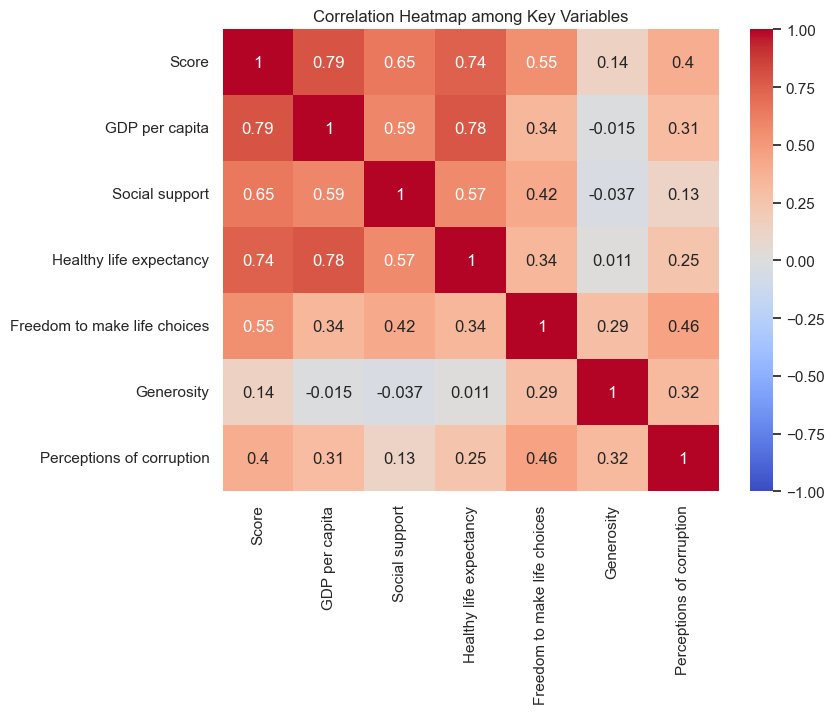

In [24]:
numeric_cols = ["Score", "GDP per capita", "Social support", 
                "Healthy life expectancy", "Freedom to make life choices",
                "Generosity", "Perceptions of corruption"]

corr = df_all[numeric_cols].corr()
print("\nCorrelation Matrix among Numeric Variables:\n", corr)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap among Key Variables")
plt.show()


# 6. Multiple Linear Regression Analysis

In this study, I employ multiple linear regression analysis to evaluate the impact of several key factors—GDP, social support, healthy life expectancy, freedom to make life choices, and perceptions of corruption—on the happiness score. By using this model, I can quantify the contribution of each factor to overall well-being and identify which elements have the most substantial influence on happiness. This approach not only offers a clear measurement of individual contributions but also enhances our understanding of how these diverse factors collectively shape the quality of life.

In [25]:
import statsmodels.api as sm

X = df_2019[["GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Perceptions of corruption"]]
y = df_2019["Score"]

# Add an intercept term
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Output the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     105.0
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           3.59e-47
Time:                        17:49:51   Log-Likelihood:                -120.27
No. Observations:                 156   AIC:                             252.5
Df Residuals:                     150   BIC:                             270.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

The results indicate that the model fits the data well (R² = 77.8%), and the selected variables significantly explain the variation in the Happiness Score. Notably, Social support (coef = 1.1180, p < 0.001) has the strongest impact on happiness, emphasizing the importance of strong interpersonal relationships. Freedom to make life choices (coef = 1.5340, p < 0.001) is also a significant contributor, suggesting that the ability to choose one’s lifestyle greatly enhances happiness. Healthy life expectancy (coef = 1.0840, p < 0.001) directly correlates with happiness, with longer life expectancy associated with higher happiness scores. Although GDP (coef = 0.7455, p < 0.001) positively influences happiness, its effect is smaller compared to Social support and freedom. Perceptions of corruption (coef = 1.1176, p = 0.034) also have a statistically significant, albeit relatively weaker, effect—indicating that lower corruption levels tend to increase happiness, though the impact is less pronounced than that of other factors.

##  7. Interpretation

I found that while GDP is important, it is not the sole determinant of happiness. Happiness relies more heavily on social relationships, the freedom to choose one’s lifestyle, and overall health. Economic growth does not automatically translate into higher happiness if relative social positions remain unchanged. This aligns with the theories of “happiness economics,” where pioneers like Easterlin have argued that happiness is not solely dependent on income but also on one's relative standing within society. Therefore, even if a country’s overall economic performance improves, if individual relative positions do not change, the collective happiness may not increase. This analysis has deepened my understanding of the components and influencing factors of the happiness index and highlighted the potential of data science in social research. Ultimately, stable interpersonal relationships and robust social networks are the keys to enhancing happiness and longevity.




## 8. Ethical Considerations and Use of Language Models

The dataset is sourced from the publicly available World Happiness Report, and the analysis code was optimized with the assistance of ChatGPT. 